<a href="https://colab.research.google.com/github/project-ida/arpa-e-experiments/blob/main/tutorials/sem-eds-raw-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://nbviewer.org/github/project-ida/arpa-e-experiments/blob/main/tutorials/sem-eds-raw-data.ipynb" target="_parent"><img src="https://nbviewer.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# Working with ESM/EDS raw data

We are working with people at Texas Tech to characterise any morphological and elemental changes that take place as part of the our experiments. This involves using a scanning electron microscope to generate pictures of the material surface (so called SEM data) and also energy-dispersive X-ray spectroscopy (EDS) to analyze elemental composition.

The data is exported from [Oxford Instruments Aztec software](https://nano.oxinst.com/products/aztec/) into a HDF5 like format called [h5iona](https://github.com/oinanoanalysis/h5oina) that's stored in Google Drive, (e.g. [this folder](https://drive.google.com/drive/folders/1WqbhoVJ5d6HWgWa1Bo3wYWzeZD6t-ia5)). This data is compressed and needs to be processed for us to be able to work with.

In this notebook, we'll work with this "raw" data and show how we can load and work with this data. In [another notebook](./sem-eds-loading-numpy-data.ipynb) we'll show you how to work with the processed data.

In [ ]:
# Makes Libs accessible and runs notebook from same location regardless of whether colab or local
!pip install colocal --upgrade -q
import colocal
root, branch, cwd = colocal.setup()

[Local] Repo root added to sys.path
[Local] Working directory set to: tutorials


In [ ]:
import gdown
import h5py
import numpy as np
from tqdm import tqdm  # For progress bar
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from PIL import Image
from IPython.display import Image, display, Video, HTML

In [ ]:
# Google Drive file URL
#file_id = "1Qe67DEDiPcuzZ_5MH9C-wVPrq1VHyDz8"  # Extracted file ID from your URL
#filename = "Project 1 Specimen 1 Area 2 Site 1 Map Data 11.h5oina"

# the following is a data file from the folder "20241127 Jonah 6"

file_id = "1Qtd9BD_U5W7TxXMVeBNBWXf2IqDzeoTS"  # Extracted file ID from your URL
filename = "Project 1 Specimen 1 Area 2 Site 20 Map Data 30"

In [ ]:
url = f"https://drive.google.com/uc?id={file_id}"  # Construct direct download link
output = filename+".h5oina"

# Download file
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Qtd9BD_U5W7TxXMVeBNBWXf2IqDzeoTS
From (redirected): https://drive.google.com/uc?id=1Qtd9BD_U5W7TxXMVeBNBWXf2IqDzeoTS&confirm=t&uuid=ae1a4951-cd9b-4dee-9181-54c3bda70eac
To: /content/arpa-e-experiments/Project 1 Specimen 1 Area 2 Site 20 Map Data 30.h5oina
100%|██████████| 230M/230M [00:01<00:00, 196MB/s]


'Project 1 Specimen 1 Area 2 Site 20 Map Data 30.h5oina'

In [ ]:
file = h5py.File(output, 'r')

In [ ]:
print(list(file.keys()))  # List contents of the file

['1', 'Format Version', 'Index', 'Manufacturer', 'Software Version']


# SEM DATA

In [ ]:
group_path = '/1/Electron Image/Data/SE'
first_child = list(file[group_path].keys())[0]  # Access the first child dynamically
imagedata = file[group_path][first_child][:]  # Load the dataset as a NumPy array

In [ ]:
imagedata.shape

(720896,)

In [ ]:
imagewidth = file['/1/Electron Image/Header/X Cells'][0]
imagewidth

1024

In [ ]:
imageheight = file['/1/Electron Image/Header/Y Cells'][0]
imageheight

704

In [ ]:
pixelsizex = file['/1/Electron Image/Header/X Step'][0]
pixelsizex

0.6323242

In [ ]:
pixelsizey = file['/1/Electron Image/Header/Y Step'][0]
pixelsizey

0.6323242

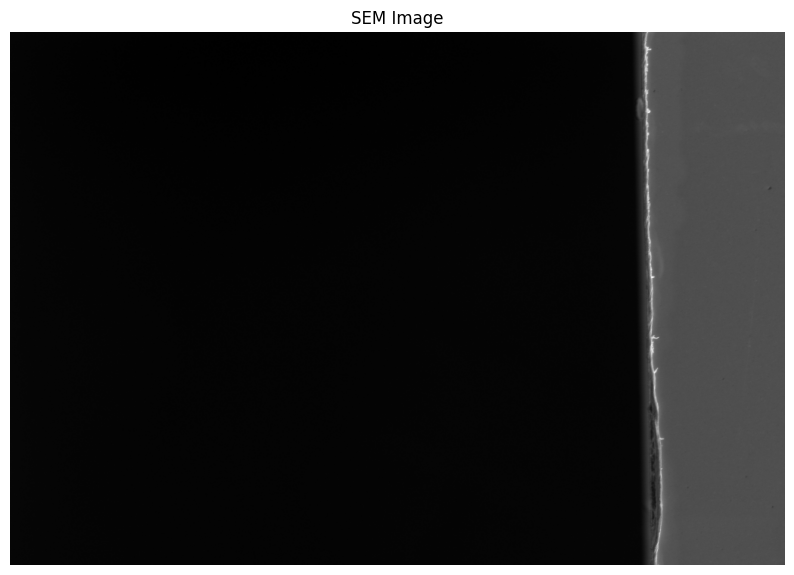

In [ ]:
# Reshape the data using the correct dimensions (height = 1408, width = 2048)
width, height = imagewidth, imageheight  # Dimensions from your provided data
data_reshaped = imagedata.reshape(height, width)

# Plot the reshaped image
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
plt.imshow(data_reshaped, cmap='gray')  # Use a grayscale colormap for SEM images
plt.title('SEM Image')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [ ]:
# Use plt's normalization for consistent appearance
fig, ax = plt.subplots()
im = ax.imshow(data_reshaped, cmap='gray')
plt.axis('off')  # Turn off the axes

# Save the image directly from the matplotlib figure
output_filename = filename+"_sem.jpg"
fig.savefig(output_filename, bbox_inches='tight', pad_inches=0, dpi=300)  # Adjust dpi for resolution
plt.close(fig)  # Close the figure to free up memory

print(f"Image saved as {output_filename} with appearance matching plt.imshow.")

Image saved as Project 1 Specimen 1 Area 2 Site 20 Map Data 30_sem.jpg with appearance matching plt.imshow.


In [ ]:
np.savez_compressed(filename+"_sem.npz", data_reshaped)

# EDS Data

In [ ]:
spectrum_Data = file['/1/EDS/Data/Spectrum']
spectrum_Data.size

2952790016

In [ ]:
spectrum_Data.shape

(2883584, 1024)

In [ ]:
X_Data = file['/1/EDS/Data/X']
X_Data.shape

(2883584,)

In [ ]:
Y_Data = file['/1/EDS/Data/Y']
Y_Data.shape

(2883584,)

In [ ]:
X_Data[0]

0.0

In [ ]:
maxx_micron = X_Data[X_Data.size-1]
maxx_micron

647.18384

In [ ]:
scaling_factor = 0.316162  # Microns per pixel

In [ ]:
Y_Data[0]

0.0

In [ ]:
maxy_micron = Y_Data[Y_Data.size-1]
maxy_micron

444.8401

In [ ]:
scaling_factor_x = maxx_micron/x_pixels
scaling_factor_x

0.31600773334503174

In [ ]:
scaling_factor_y = maxy_micron/y_pixels
scaling_factor_y

0.3159375624223189

In [ ]:
spectrum_Data[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
x_pixels = file['/1/EDS/Header/X Cells'][0]
x_pixels

2048

In [ ]:
y_pixels = file['/1/EDS/Header/Y Cells'][0]
y_pixels

1408

In [ ]:
scaling_factor_x = file['/1/EDS/Header/X Step'][0]
scaling_factor_x

0.3161621

In [ ]:
scaling_factor_y = file['/1/EDS/Header/Y Step'][0]
scaling_factor_y

0.3161621

In [ ]:
# Determine the grid size
x_pixels = len(np.unique(file['/1/EDS/Data/X']))  # Number of unique X positions
y_pixels = len(np.unique(file['/1/EDS/Data/Y']))  # Number of unique Y positions
spectrum_length = spectrum_Data.shape[1]  # Length of each spectrum
print(f"Grid size: {y_pixels} x {x_pixels} pixels.")
print(f"Spectrum length: {spectrum_length} channels.")

Grid size: 1408 x 2048 pixels.
Spectrum length: 1024 channels.


In [ ]:
# Open the file and access datasets
print("Opening HDF5 file and preparing for chunked processing...")

spectra_array2 = np.zeros((y_pixels, x_pixels, spectrum_length), dtype=np.uint8)

# Process spectra in chunks
print("Processing spectra in chunks...")
chunk_size = 10000  # Adjust based on your system's memory
for start_idx in tqdm(range(0, spectrum_Data.shape[0], chunk_size), desc="Processing chunks"):
  end_idx = min(start_idx + chunk_size, spectrum_Data.shape[0])
  chunk = spectrum_Data[start_idx:end_idx, :]  # Load chunk into memory

  # Map 1D chunk indices to 2D grid indices
  for flat_idx, spectrum in enumerate(chunk):
    y_idx = (start_idx + flat_idx) // x_pixels
    x_idx = (start_idx + flat_idx) % x_pixels
    spectra_array2[y_idx, x_idx, :] = spectrum

print("Spectra processing complete.")

Opening HDF5 file and preparing for chunked processing...
Processing spectra in chunks...


Processing chunks: 100%|██████████| 289/289 [05:30<00:00,  1.14s/it]

Spectra processing complete.


In [ ]:
np.savez_compressed(filename+"_eds.npz", spectra_array2)

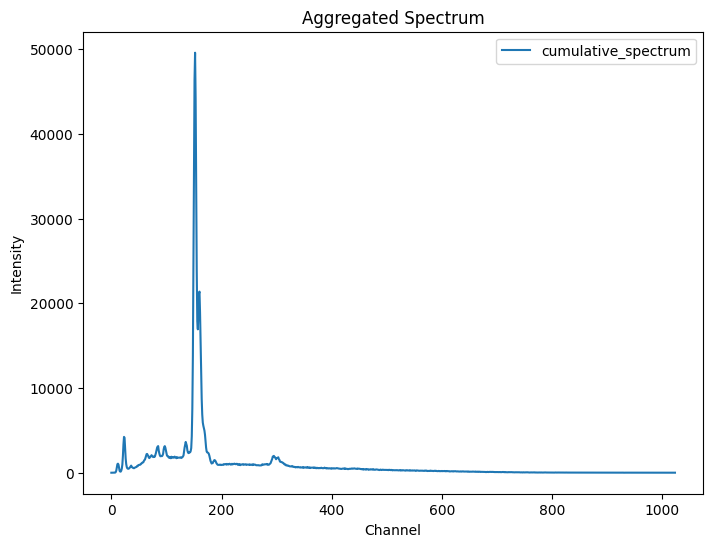

In [ ]:
# Aggregate the spectrum for the bottom-right quadrant
cumulative_spectrum = np.sum(spectra_array2, axis=(0, 1))

# Plot the spectrum for the bottom-right quadrant
plt.figure(figsize=(8, 6))
plt.plot(cumulative_spectrum, label="cumulative_spectrum")

plt.title("Aggregated Spectrum")
plt.xlabel("Channel")
plt.ylabel("Intensity")
plt.legend()
plt.show()

In [ ]:
start_channel = file['/1/EDS/Header/Start Channel'][0]
start_channel

-192.55421

In [ ]:
channel_width = file['/1/EDS/Header/Channel Width'][0] # in eV
channel_width

20.000347

In [ ]:
file['/1/EDS/Header/Energy Range'][0] # in keV

20.0

In [ ]:
num_channels = file['/1/EDS/Header/Number Channels'][0]
num_channels

1024

In [ ]:
pd_start_channel = 140
pd_end_channel = 170

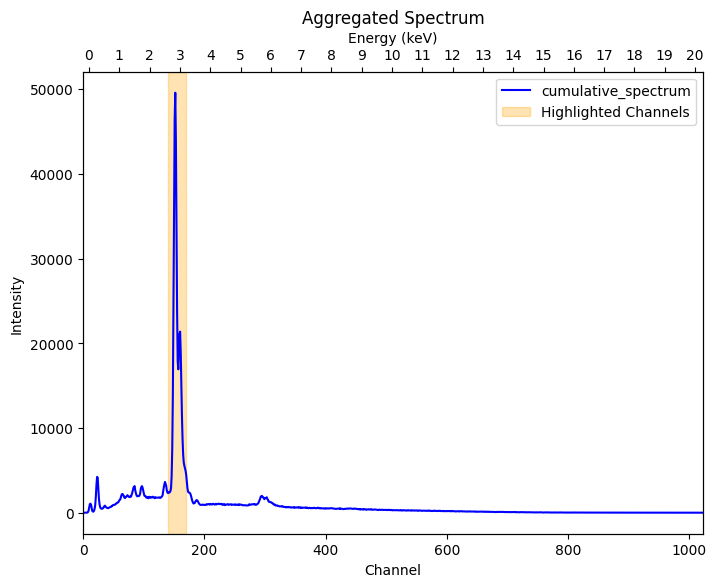

In [ ]:
# Calculate the energy axis in keV
channels = np.arange(num_channels)
energy_keV = (start_channel + channels * channel_width) / 1000  # Convert eV to keV

# Aggregate the spectrum for the bottom-right quadrant
cumulative_spectrum = np.sum(spectra_array2, axis=(0, 1))

# Plot the spectrum with dual x-axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the spectrum on the first axis
ax1.plot(channels, cumulative_spectrum, label="cumulative_spectrum", color="blue")
ax1.set_xlabel("Channel")
ax1.set_ylabel("Intensity")
ax1.legend(loc="upper right")
ax1.set_title("Aggregated Spectrum")

# Highlight the channels with a semitransparent rectangle
ax1.axvspan(pd_start_channel, pd_end_channel, color="orange", alpha=0.3, label="Highlighted Channels")
ax1.legend(loc="upper right")

# Set x-axis limits explicitly to start from the leftmost edge
ax1.set_xlim(0, num_channels - 1)  # Channels range from 0 to 1023

# Create a second x-axis for energy in keV
ax2 = ax1.twiny()

# Define energy tick marks (0 to 20 keV in increments of 1 keV)
energy_ticks_keV = np.arange(0, 21, 1)  # Energy values in keV
channel_positions = [(e * 1000 - start_channel) / channel_width for e in energy_ticks_keV]

# Set the energy ticks and labels
ax2.set_xlim(ax1.get_xlim())  # Ensure upper and lower axes are aligned
ax2.set_xticks(channel_positions)
ax2.set_xticklabels([f"{e:.0f}" for e in energy_ticks_keV])
ax2.set_xlabel("Energy (keV)")

plt.show()

In [ ]:
def channel_to_keV(channel, start_channel, channel_width):
    """
    Convert a channel number into energy (keV).

    Parameters:
        channel (int or float): The channel number to convert.
        start_channel (float): The start channel value in eV.
        channel_width (float): The channel width in eV.

    Returns:
        float: Energy in keV.
    """
    energy_keV = (start_channel + channel * channel_width) / 1000  # Convert eV to keV
    return energy_keV

In [ ]:
peak_channel = np.argmax(cumulative_spectrum)
peak_channel

152

In [ ]:
energy = channel_to_keV(peak_channel, start_channel, channel_width)
print(f"Channel {peak_channel} corresponds to {energy:.2f} keV.")

Channel 152 corresponds to 2.85 keV.


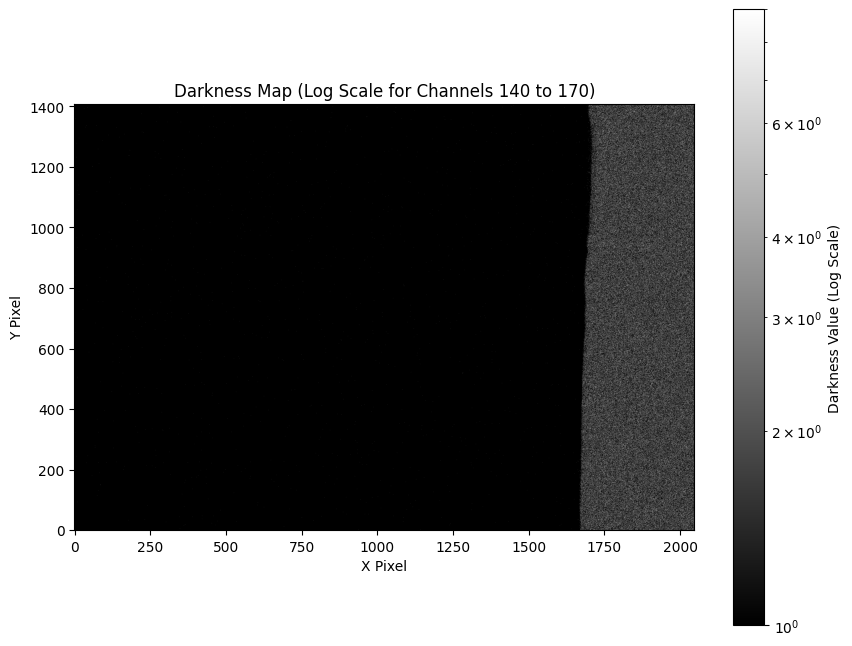

In [ ]:
# Sum the counts across the subset of channels for every pixel
subset_sums = np.sum(spectra_array2[:, :, pd_start_channel:pd_end_channel + 1], axis=2)

# Normalize the sums to avoid zero values (Log scale requires positive values)
subset_sums = subset_sums + 1  # Add a small offset to avoid log(0)

# Plot the darkness map with a log scale
plt.figure(figsize=(10, 8))
plt.imshow(subset_sums, cmap="gray", norm=LogNorm(vmin=subset_sums.min(), vmax=subset_sums.max()), origin="lower")
plt.colorbar(label="Darkness Value (Log Scale)")
plt.title("Darkness Map (Log Scale for Channels 140 to 170)")
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.show()

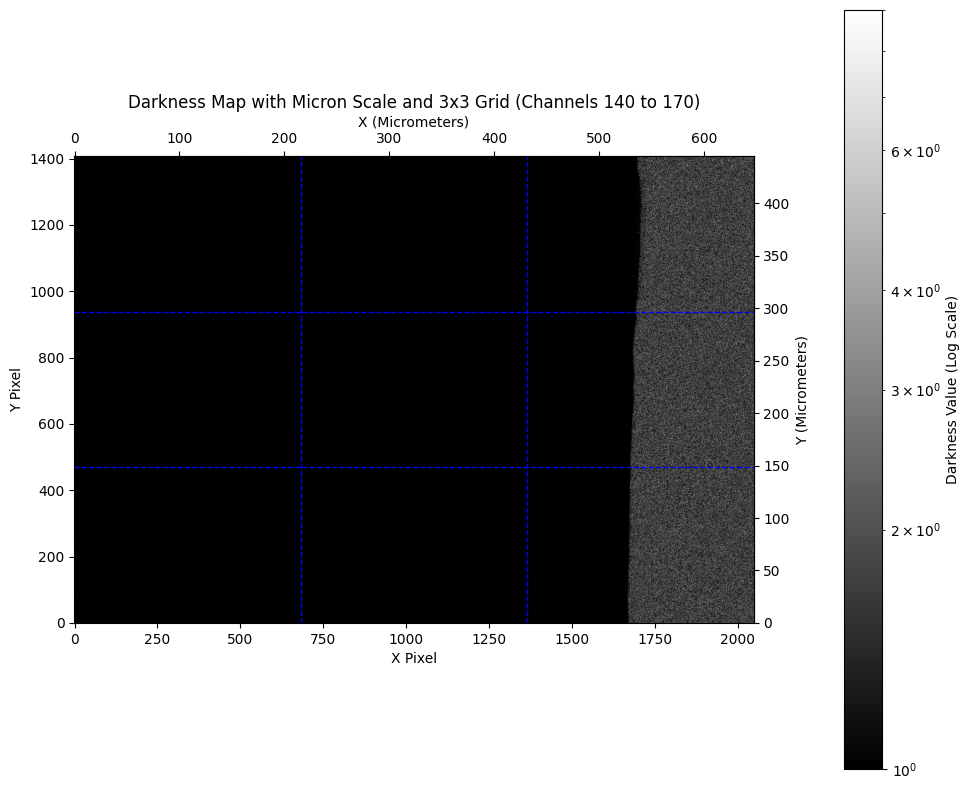

In [ ]:
scaling_factor = scaling_factor_x  # Microns per pixel

# Calculate dimensions
y_pixels, x_pixels, _ = spectra_array2.shape

# Sum the counts across the subset of channels for every pixel
subset_sums = np.sum(spectra_array2[:, :, pd_start_channel:pd_end_channel + 1], axis=2)
subset_sums = subset_sums + 1  # Avoid log(0)

# Create the figure and plot the darkness map
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(subset_sums, cmap="gray", norm=LogNorm(vmin=subset_sums.min(), vmax=subset_sums.max()), origin="lower")

# Set primary axes labels (pixels)
ax.set_xlabel("X Pixel")
ax.set_ylabel("Y Pixel")

# Add secondary axes for microns
def pixel_to_micron(pix, scaling_factor):
    return pix * scaling_factor

# X-axis
secax_x = ax.secondary_xaxis('top', functions=(lambda x: pixel_to_micron(x, scaling_factor),
                                               lambda x: x / scaling_factor))
secax_x.set_xlabel("X (Micrometers)")

# Y-axis
secax_y = ax.secondary_yaxis('right', functions=(lambda y: pixel_to_micron(y, scaling_factor),
                                                 lambda y: y / scaling_factor))
secax_y.set_ylabel("Y (Micrometers)")

# Add colorbar with proper spacing
cbar = fig.colorbar(im, ax=ax, label="Darkness Value (Log Scale)", pad=0.1)

# Add title
plt.title("Darkness Map with Micron Scale and 3x3 Grid (Channels 140 to 170)")

# Superimpose the 3x3 grid
for i in range(1, 3):  # Vertical grid lines (for x)
    x_line = i * x_pixels // 3
    ax.axvline(x=x_line, color='blue', linestyle='--', linewidth=1)

for j in range(1, 3):  # Horizontal grid lines (for y)
    y_line = j * y_pixels // 3
    ax.axhline(y=y_line, color='blue', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

plt.show()

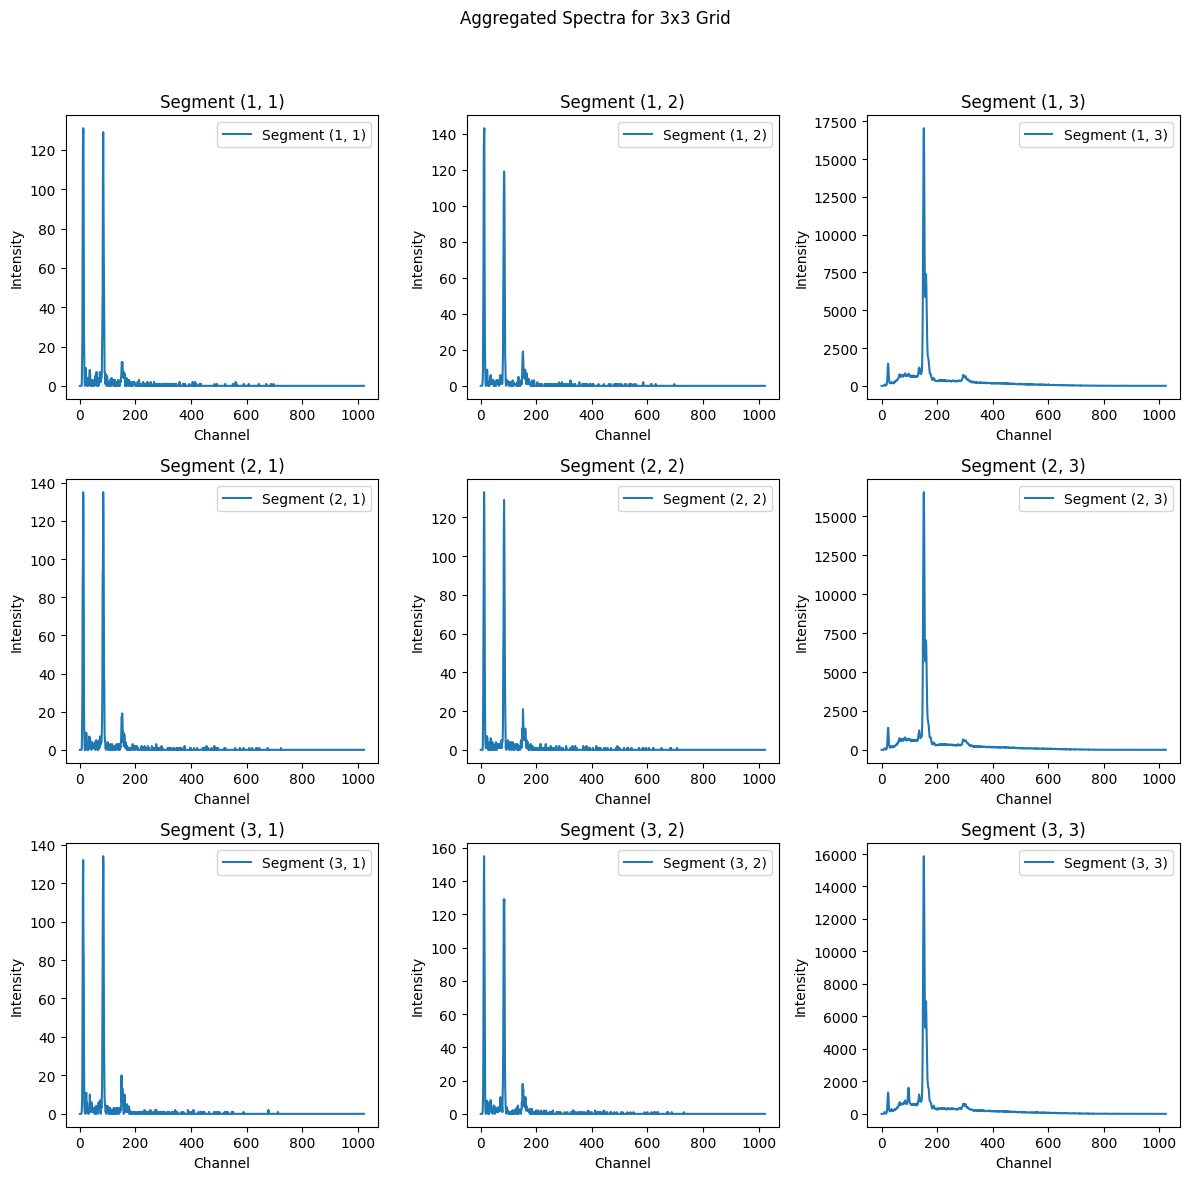

In [ ]:
# Define the grid size for 3x3 segmentation
y_segments = 3
x_segments = 3

# Calculate the boundaries of each segment
y_step = y_pixels // y_segments
x_step = x_pixels // x_segments

# Initialize a list to store aggregated spectra for each segment
aggregated_spectra = []

# Aggregate spectra for each segment in the 3x3 grid
for i in range(y_segments):
    for j in range(x_segments):
        y_start, y_end = i * y_step, (i + 1) * y_step if i < y_segments - 1 else y_pixels
        x_start, x_end = j * x_step, (j + 1) * x_step if j < x_segments - 1 else x_pixels
        segment_spectrum = np.sum(spectra_array2[y_start:y_end, x_start:x_end, :], axis=(0, 1))
        aggregated_spectra.append(segment_spectrum)

# Plot the spectra for each segment in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle("Aggregated Spectra for 3x3 Grid")

for idx, ax in enumerate(axs.flat):
    row, col = divmod(idx, 3)
    ax.plot(aggregated_spectra[idx], label=f"Segment ({row+1}, {col+1})")
    ax.set_title(f"Segment ({row+1}, {col+1})")
    ax.set_xlabel("Channel")
    ax.set_ylabel("Intensity")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# STICHING DATA

In [ ]:
file['/1/EDS/Header/Stage Position/X'][0] # in mm

65.65

In [ ]:
file['/1/EDS/Header/Stage Position/Y'][0] # in mm

25.614

In [ ]:
file['/1/EDS/Header/Stage Position/Z'][0] # in mm

10.57008

The site numbers move from the bottom left upwards in the first column (from 1 to 25) and then start at the bottom of the second column again, moving upward. One can also check the X and Y values (in mm) in the Header/Stage Position part of the H5 files.

<img src="media/aztec-01.png" width="1474">

<img src="media/aztec-02.png" width="1474">

<img src="media/aztec-03.png" width="1474">

<img src="media/aztec-04.png" width="1474">

<img src="media/aztec-05.png" width="1474">